In [1]:
#importando as bibliotecas necessárias
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#carregando a base de dados com as categorias geradas pelo modelo gpt3.5-turbo
path = "./gpt35turbo_generated_issues.csv"
data = pd.read_csv(path)
data.head(3)

,name,review,rating,language,sentiment,issue
0,Michael Capela,"Não recomendo o C6 Bank para ninguém, simplesm...",1.0,pt,NEGATIVE,Customer Support
1,Edson Pereira,Tenho conta ha tempos. Boa movimentação no car...,2.0,pt,NEGATIVE,Credit Refusal
2,JOÃO BAND,"pior empresa pra se ter conta, meu deus... blo...",1.0,pt,NEGATIVE,Customer Support


In [3]:
#checando as categorias geradas pelo modelo gpt 3.5 turbo
issues = list(data["issue"].unique())
issues

['Customer Support',
 'Credit Refusal',
 'User Experience',
 'Category: User Experience',
 'Improper Billing',
 'Category: Customer Support',
 'Category: Credit Refusal',
 'Fraud',
 'Credit Refusal.',
 'Customer Support.',
 'Category: Improper Billing',
 'User Experience.',
 'Fraud.',
 'The review falls under the',
 'Category: Fraud',
 'Improper Billing and User',
 "['Fraud']",
 'The review falls into the',
 'I would categorize this',
 "['Customer Support']",
 'Category: Customer Support.',
 'The review can be categorized',
 "['Credit Refusal']",
 'Category: User Experience.',
 'Improper Billing.',
 "Category: 'Fraud",
 'This review can be categorized']

Como podemos ver, o chat gerou outputs diferentes para categorias que se referem ao mesmo tipo de problema, portanto, devemos fazer alguns ajustes

In [4]:
#definindo um dicionário para renomear as categorias
rename_dict = {'Category: User Experience': 'User Experience',
              'Category: Customer Support': 'Customer Support',
              'Category: Credit Refusal': 'Credit Refusal',
               'Category: Customer Support.': 'Customer Support',
              'Credit Refusal.': 'Credit Refusal',
              'Customer Support.': 'Customer Support',
              'Category: Improper Billing': 'Improper Billing',
              'User Experience.': 'User Experience',
              'Fraud.': 'Fraud',
              'Category: Fraud': 'Fraud',
              "['Fraud']": 'Fraud',
              "['Customer Support']": 'Customer Support',
              "['Credit Refusal']": 'Credit Refusal',
              'Category: User Experience.': 'User Experience',
              'Improper Billing.': 'Improper Billing',
              "Category: 'Fraud": 'Fraud',
              }

#aplicando a substituição
data["issue"] = data["issue"].replace(rename_dict)

In [5]:
#agrupando as categorias por contagem de cada uma delas
df_issues = pd.DataFrame(data.groupby(["issue"])["issue"].count().rename("total_reviews"))
df_issues = df_issues.reset_index()
df_issues = df_issues.sort_values(by="total_reviews", ascending=False)
df_issues.head(3)

,issue,total_reviews
1,Customer Support,442
10,User Experience,228
4,Improper Billing,124


In [7]:
#vamos filtrar apenas as categorias que foram definidas previamente e que fazem sentido à análise
df_issues = df_issues[df_issues["total_reviews"] >= 51]

Text(0.5, 1.0, 'Contagem de reviews por categoria')

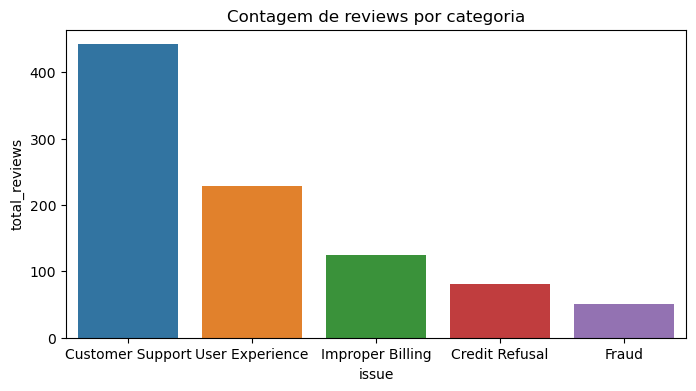

In [10]:
#visualizando a contagem de reviews por categoria
plt.figure(figsize=(8, 4))
sns.barplot(data=df_issues, x="issue", y="total_reviews")
plt.title("Contagem de reviews por categoria")

### Analisando os resultados

Em termos de volume de reclamações, o suporte ao cliente certamente é um problema a ser atacado. Porém, como cobrança indevida também é uma situação que gera uma experiência bem desgastante na perspectiva do cliente, vamos usá-la também para construir esboços de possíveis abordagens para amenizar essas situações